## Table of Contents
- [Gather](#gather)
- [Assess](#assess)
    * [Quality Issues](#assess_quality)
    * [Tidiness Issues](#assess_tidiness)
- [Clean](#clean)
    * [Tidiness Issues](#clean_tidiness)
    * [Quality Issues](#clean_quality)
- [Exploratory Data Analysis](#eda)

<a id='gather'></a>
## Gather

In [1]:
# Import the Python packages we need to use in the project
import numpy as np
import pandas as pd
import requests
import re

In [2]:
# Check version of modules which will be used in this project
# https://unix.stackexchange.com/questions/47918/how-to-grep-a-specific-line-and-the-first-line-of-a-file
# https://www.setouchino.cloud/blogs/108
# https://stackoverflow.com/questions/61325817/differences-between-matplotlib-and-matplotlib-base
!conda list | awk 'NR <= 3 || /bokeh/ || /matplotlib/ || /numpy/ || /pandas/ || /requests /'

# packages in environment at /srv/conda/envs/notebook:
#
# Name                    Version                   Build  Channel
bokeh                     2.3.3                    pypi_0    pypi
matplotlib                3.1.3                    py37_0    conda-forge
matplotlib-base           3.1.3            py37h250f245_0    conda-forge
matplotlib-inline         0.1.3              pyhd8ed1ab_0    conda-forge
numpy                     1.21.2           py37h31617e3_0    conda-forge
pandas                    1.3.3            py37he8f5f7f_0    conda-forge
requests                  2.26.0             pyhd8ed1ab_0    conda-forge


In [3]:
# Check version of Jupyter components
!jupyter --version

Selected Jupyter core packages...
IPython          : 7.28.0
ipykernel        : 5.1.4
ipywidgets       : 7.6.3
jupyter_client   : 7.0.6
jupyter_core     : 4.8.1
jupyter_server   : 1.11.1
jupyterlab       : 3.2.0
nbclient         : 0.5.4
nbconvert        : 6.0.7
nbformat         : 5.1.3
notebook         : 6.3.0
qtconsole        : not installed
traitlets        : 5.1.0


In [4]:
# Download 1st file of the project
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
filename = url.split('/')[-1]

response = requests.get(url)
with open(filename, mode='wb') as file:
    file.write(response.content)

# Load 1st file into a DataFrame
df_twitter_archive_orig = pd.read_csv('twitter-archive-enhanced.csv')

In [5]:
# Download 2nd file of the project
# This file should be downloaded programmatically using the Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
filename = url.split('/')[-1]

response = requests.get(url)
with open(filename, mode='wb') as file:
    file.write(response.content)

# Load 2nd file into a DataFrame
df_image_prediction_orig = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
# Install tweepy library module
!pip install tweepy

# https://stackoverflow.com/questions/5189199/bypass-confirmation-prompt-for-pip-uninstall
# In case you want to uninstall tweepy library module, run the following commands
#!/usr/bin/yes 2>/dev/null | pip uninstall tweepy
#!/usr/bin/yes 2>/dev/null | pip uninstall requests-oauthlib

     |████████████████████████████████| 64 kB 2.5 MB/s eta 0:00:011


In [7]:
# Run Twitter API code 
# Notice: instead of paste & run script codes in notebook as directed by Udacity, it is recommended to run the script 
# in a separate terminal window, because it takes several tens of minutes to complete its execution
# https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-run
#%run twitter-api.py

# Notice : This command was left commented because we do not have access to a Twitter developer account
# Related API keys, tokens, secrets should be populated before executing this script

In [8]:
# Download 3rd file of the project
# This file should be downloaded only if you do not have access to a Twitter developer account
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
filename = url.split('/')[-1]

response = requests.get(url)
with open(filename, mode='wb') as file:
    file.write(response.content)

In [9]:
# Load 3rd file into a DataFrame
# https://pandas.pydata.org/docs/reference/api/pandas.io.json.read_json.html
df_twitter_api_json_orig = pd.read_json('tweet-json.txt', lines=True)

In [10]:
# Make duplicates of original DataFrames and use these copies to perform analysis afterwards
df_1 = df_twitter_archive_orig.copy()
df_2 = df_image_prediction_orig.copy()
df_3 = df_twitter_api_json_orig.copy()

<a id='assess'></a>
## Assess

In [11]:
# Default limits when displaying DataFrame.info()
# Can be overrided by setting arguments verbose=True and show_counts=True
#print(pd.options.display.max_info_columns) # 100
#print(pd.options.display.max_info_rows) # 1690785

# Default limits when displaying DataFrame itself
#print(pd.options.display.max_columns) # 20
#print(pd.options.display.max_rows) # 60

# WARNING - DO NOT SET THESE OPTIONS TO "NONE" UNLESS YOU ARE TRYING TO PRINT A SMALL DATAFRAME ON SCREEN
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [12]:
# Check rows and columns of DataFrames
print(df_1.shape)
print(df_2.shape)
print(df_3.shape)

(2356, 17)
(2075, 12)
(2354, 31)


In [13]:
# No duplicate data entry detected if the command returns "True"
# There are some gotchas when our DataFrames contain lists, instead of scalar values, in their columns
# https://stackoverflow.com/questions/43855462/pandas-drop-duplicates-method-not-working-on-dataframe-containing-lists
#print(df_1.shape == df_1.drop_duplicates().shape)
#print(df_2.shape == df_2.drop_duplicates().shape)
#print(df_3.shape == df_3.drop_duplicates().shape) # won't work
print(df_1.shape == df_1.loc[df_1.astype(str).drop_duplicates().index].shape)
print(df_2.shape == df_2.loc[df_2.astype(str).drop_duplicates().index].shape)
print(df_3.shape == df_3.loc[df_3.astype(str).drop_duplicates().index].shape)

True
True
True


In [14]:
# Display first 5 rows of DataFrames
display(df_1.head())
display(df_2.head())
display(df_3.head())

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [15]:
# Check columns which contain NULL values, and column datatypes by .info() method
display(df_1.info(verbose=True, memory_usage='deep', show_counts=True))
display(df_2.info(verbose=True, memory_usage='deep', show_counts=True))
display(df_3.info(verbose=True, memory_usage='deep', show_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 717.9 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

None

In [16]:
# Find out tweet_id differences between df_1 and df_3 before merging
# Our surveys show there are 2 more tweet_id values in df_1
display(pd.merge(df_1['tweet_id'], df_3['id'], how="left", left_on='tweet_id', right_on='id').query('id.isnull() == True'))
display(pd.merge(df_1['tweet_id'], df_3['id'], how="right", left_on='tweet_id', right_on='id').query('tweet_id.isnull() == True'))

,tweet_id,id
19,888202515573088257,NaN
815,771004394259247104,NaN


,tweet_id,id


In [17]:
# Both of the entries are retweets, we can safely ignore them
display(df_1.loc[df_1['tweet_id'] == 888202515573088257])
display(df_1.loc[df_1['tweet_id'] == 771004394259247104])

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @katieornah: @dog_rates learning a lot at c...,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,https://twitter.com/katieornah/status/77100213...,12,10,None,None,None,pupper,None


In [18]:
# The sample tweet below shows 'expanded_urls' in df_1 is a duplicated column and should be dropped to maintain tidyness

# data in df_1.expanded_urls
df_1.query('tweet_id == 854010172552949760').expanded_urls[df_1.query('tweet_id == 854010172552949760').index[0]]

'https://twitter.com/dog_rates/status/854010172552949760/photo/1,https://twitter.com/dog_rates/status/854010172552949760/photo/1'

In [19]:
# data in df_3.entities (focus on dictionary key 'expanded_url' and its contents)
df_3.query('id == 854010172552949760').entities[df_3.query('id == 854010172552949760').index[0]]['media']

[{'id': 854010162683707392,
  'id_str': '854010162683707392',
  'indices': [141, 164],
  'media_url': 'http://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg',
  'media_url_https': 'https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg',
  'url': 'https://t.co/TXdT3tmuYk',
  'display_url': 'pic.twitter.com/TXdT3tmuYk',
  'expanded_url': 'https://twitter.com/dog_rates/status/854010172552949760/photo/1',
  'type': 'photo',
  'sizes': {'small': {'w': 680, 'h': 485, 'resize': 'fit'},
   'medium': {'w': 1200, 'h': 857, 'resize': 'fit'},
   'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
   'large': {'w': 2048, 'h': 1462, 'resize': 'fit'}}}]

In [20]:
# data in df_3.extended_entities (focus on dictionary key 'expanded_url' and its contents)
df_3.query('id == 854010172552949760').extended_entities[df_3.query('id == 854010172552949760').index[0]]['media']

[{'id': 854010162683707392,
  'id_str': '854010162683707392',
  'indices': [141, 164],
  'media_url': 'http://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg',
  'media_url_https': 'https://pbs.twimg.com/media/C9oNt91WAAAFSLS.jpg',
  'url': 'https://t.co/TXdT3tmuYk',
  'display_url': 'pic.twitter.com/TXdT3tmuYk',
  'expanded_url': 'https://twitter.com/dog_rates/status/854010172552949760/photo/1',
  'type': 'photo',
  'sizes': {'small': {'w': 680, 'h': 485, 'resize': 'fit'},
   'medium': {'w': 1200, 'h': 857, 'resize': 'fit'},
   'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
   'large': {'w': 2048, 'h': 1462, 'resize': 'fit'}}},
 {'id': 854010162683760643,
  'id_str': '854010162683760643',
  'indices': [141, 164],
  'media_url': 'http://pbs.twimg.com/media/C9oNt91W0AMQ7fk.jpg',
  'media_url_https': 'https://pbs.twimg.com/media/C9oNt91W0AMQ7fk.jpg',
  'url': 'https://t.co/TXdT3tmuYk',
  'display_url': 'pic.twitter.com/TXdT3tmuYk',
  'expanded_url': 'https://twitter.com/dog_rates/status/854010

In [21]:
# EXTRA : Check the name of the doggies

# Looks like there are 745 dog photos submitted to @dog_rates with no dog names attached to the message
# Also, we can see there are 55 dog photos with a name called "a" in the dataset, which is certainly unusual
df_1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

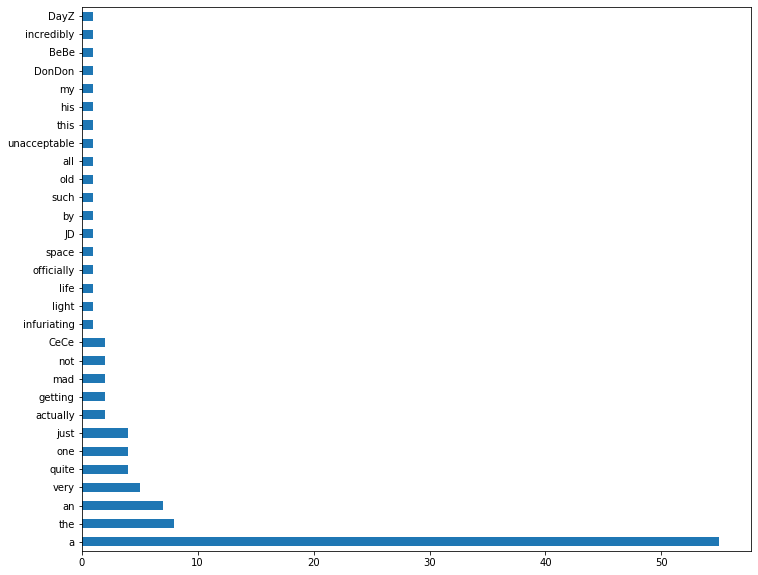

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

# Use a barh plot to show the rough list of name entries that may be abnormal
# Notice there are some funny name entries such as 'a', 'the', 'an', 'very', 'quite', 'just', 'one' in the dataset
df_1.query('name.str.istitle() == False').name.value_counts().plot(kind='barh', figsize=(12,10));

In [23]:
# EXTRA : Check the ratings between the ones stored in related columns of the CSV file, and the ones extracted from the original Tweet text

# Create a separate DataFrame dedicated to the checking task
df_1_check = df_twitter_archive_orig.copy()
df_1_check.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)
df_1_check['text_split_list'] = df_1_check.text.str.split(' ')

# User-defined function to extract raw numerators and denominators from the Tweet text
def rating_extract(str_list):
    rating_like_list = [] # As we will see later, there are some Tweets which contain more than one rating "candidates"
    for s in str_list:
        # https://www.guru99.com/python-regular-expressions-complete-tutorial.html
        # https://stackoverflow.com/questions/26137955/python-regex-for-number-with-or-without-decimals-using-a-dot-or-comma-as-separat
        # https://stackoverflow.com/questions/4703390/how-to-extract-a-floating-number-from-a-string
        # https://stackoverflow.com/questions/12643009/regular-expression-for-floating-point-numbers/12643073
        # The code below can also be rewritten as the following:
        # match_object = re.search('[-+]?[0-9]+[.]?[0-9]*/[-+]?[0-9]*[.]?[0-9]+', s)
        match_object = re.search('[-+]?\d+\.?\d*/[-+]?\d*\.?\d+', s)
        # Mapping of the regex fragments to the dog Tweet ratings (excluding '' quotes)
        #   [-+]?\d+\.?\d*  /  [-+]?\d*\.?\d+
        #          ^        ^        ^
        #          |        |        |
        #          |        |        |
        #          |        |        |
        #      numerator    /    denominator
        # [-+]? : optional plus/minus sign, trailing ? means matches 0 or 1 time
        # \d+ : any number (a digit) with 1 or more matches, trailing + means matches 1 or more times
        # \.? : optional decimal dot, character "." needs to be escaped, trailing ? means matches 0 or 1 time
        # \d* : any number (a digit) with 0 or more matches, trailing * means matches 0 or more times
        # Notice that character "/" does not need to be escaped, and hence it is unmodified in the regex
        # We are applying the regex filter to both the numerator and denominator, just in case
        if match_object:
            # https://stackoverflow.com/questions/15340582/python-extract-pattern-matches
            # https://docs.python.org/3/library/re.html#match-objects
            # If you do not use .group() to return matched subgroup, you will get ratings with unwanted characters
            rating_like_list.append(match_object.group(0))
    return rating_like_list

df_1_check['rating_extract_list'] = df_1_check['text_split_list'].apply(lambda x: rating_extract(x))
df_1_check['rating_extract_list_length'] = df_1_check['rating_extract_list'].apply(lambda x: len(x))

In [24]:
# User-defined function to identify raw numerators represented in float numbers
def rating_check_float(str_list):
    r = ''
    for s in str_list:
        if re.match('[0-9]+[.][0-9]*', s.split('/')[0]):
            r = 'Y'
        else:
            continue
    if r != 'Y':
        r = 'N'
    return r

df_1_check['rating_numerator_float_flag'] = df_1_check['rating_extract_list'].apply(lambda x: rating_check_float(x))

In [25]:
# User-defined function to identify raw numerators represented in negative numbers
def rating_check_negative(str_list):
    r = ''
    for s in str_list:
        if re.match('[-][0-9]+[.]?[0-9]*', s.split('/')[0]):
            r = 'Y'
        else:
            continue
    if r != 'Y':
        r = 'N'
    return r

df_1_check['rating_numerator_negative_flag'] = df_1_check['rating_extract_list'].apply(lambda x: rating_check_negative(x))

In [26]:
# List of wrongly extracted rating string samples excerpted from raw data (Tweets with multi rating items omitted)
# Notice that index 2260 contains a **negative** numerator
#
#index                       rating_extract_list
#27                                [13/10,]
#45                               [13.5/10]
#97                                [12/10.]
#98                                [12/10.]
#101                               [14/10,]
#113                            [&gt;10/10]
#114                        [13/10\n\nHelp]
#118                               [12/10…]
#159                               [13/10,]
#161                               [13/10,]
#184                               [14/10.]
#204                  [13/10\n\nhttps://t…]
#233                               [12/10,]
#248                               [13/10,]
#251                               [13/10.]
#274                            [&gt;10/10]
#302                               [11/10,]
#340                              [9.75/10]
#342                             [11/15/15]
#344     [12/10\n\nhttps://t.co/P0bO8mCQwN]
#349     [13/10\n\nhttps://t.co/piiX0ke8Z6]
#358                               [13/10,]
#387                              [007/10,]
#397                               [12/10.]
#398                               [12/10.]
#434                  [14/10\n\nhttps://t…]
#436     [14/10\n\nhttps://t.co/XQlmPTLHPl]
#516                                 [24/7]
#551       [13/10\nhttps://t.co/LEZ8jR5txd]
#620       [13/10\nhttps://t.co/a18mzkhTf6]
#676       [13/10\nhttps://t.co/G2ms0A5jWM]
#695                              [9.75/10]
#707                               [10/10,]
#742                           [\n\n12/10.]
#763                             [11.27/10]
#799                      [position\n11/10]
#805                             [it.10/10]
#807       [13/10\nhttps://t.co/yOVzAomJ6k]
#885                               [11/10,]
#890                             [...10/10]
#895                        [RIDE\n\n11/10]
#945                              [\n10/10]
#976                               [10/10s]
#988                             [...10/10]
#1008                            [...11/10]
#1009                            [...10/10]
#1015                            [...11/10]
#1017                            [...11/10]
#1018                          [2.0\n13/10]
#1025                             [...9/10]
#1040      [12/10\nhttps://t.co/RNqS7C4Y4N]
#1053                              [14/10,]
#1071                            [...10/10]
#1077                            [...10/10]
#1084                            [...10/10]
#1098                            [...10/10]
#1111                            [...10/10]
#1130                    [accepted"\n10/10]
#1242                              [12/10.]
#1260                            [💚\n13/10]
#1265                              [12/10!]
#1266                            [...12/10]
#1322                            [...11/10]
#1326                       [ovation.13/10]
#1341                            [...12/10]
#1372                             [...9/10]
#1435                      [dogs.\n...8/10]
#1446                               [1/10.]
#1474                              [10/10.]
#1479                              [11/10.]
#1506                       [COMING\n10/10]
#1609                              [14/10.]
#1610                             [...9/10]
#1621                              [11/10.]
#1627                            [...10/10]
#1630                              [12/10.]
#1634                            [143/130.]
#1636                               [6/10s]
#1653                               [(8/10]
#1663                              [20/16,]
#1667                              [11/10s]
#1672                         [can't\n9/10]
#1689                             [9.5/10.]
#1693                           [u.\n12/10]
#1712                            [11.26/10]
#1819                               [7/10.]
#1846                              [10/10s]
#1847                              [11/10s]
#1863                              [13/10.]
#1883                    [together.\n10/10]
#1891                              [10/10s]
#1895                              [11/10.]
#1896                           [🎶"\n11/10]
#1899                               [9/10s]
#1914                        [13/10\n@ABC7]
#1918                        [RIDE"\n10/10]
#1940                               [1/10.]
#2038                               [1/10.]
#2070                               [4/10s]
#2076                               [4/10s]
#2089                               [9/10.]
#2092                           [do?\n5/10]
#2093                               [7/10s]
#2094                       [bone?"\n10/10]
#2127                       [RIDE\n\n11/10]
#2131                        [rude"\n10/10]
#2137                              [11/10s]
#2142                              [10/10s]
#2155                        [right\n10/10]
#2216                       [8/10&amp;1/10]
#2220                               [9/10s]
#2223                               [9/10s]
#2236                               [9/10s]
#2246                         [10&amp;2/10]
#2250                        [12/10\n\nI'm]
#2260                               [-5/10]
#2264                            [:(\n9/10]
#2268                               [8/10s]
#2270                              [11/10s]
#2274                               [7/10s]
#2321                       [hell\n\n10/10]


In [27]:
# Uncomment and execute the code in this cell to prevent lengthy data values from being displayed in truncated forms
# https://stackoverflow.com/questions/35863082/pandas-html-dont-truncate-long-values
#pd.set_option('display.max_colwidth', None)

In [28]:
# Find the list of Tweets with a float rating_numerator
df_1_check.query('rating_numerator_float_flag == "Y"')

,tweet_id,text,rating_numerator,rating_denominator,name,text_split_list,rating_extract_list,rating_extract_list_length,rating_numerator_float_flag,rating_numerator_negative_flag
45,883482846933004288,This is Bella. She hopes her smile made you sm...,5,10,Bella,"[This, is, Bella., She, hopes, her, smile, mad...",[13.5/10],1,Y,N
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",75,10,Logan,"[RT, @dog_rates:, This, is, Logan,, the, Chow,...",[9.75/10],1,Y,N
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,"[This, is, Logan,, the, Chow, who, lived., He,...",[9.75/10],1,Y,N
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,"[This, is, Sophie., She's, a, Jubilant, Bush, ...",[11.27/10],1,Y,N
1689,681340665377193984,I've been told there's a slight possibility he...,5,10,None,"[I've, been, told, there's, a, slight, possibi...",[9.5/10],1,Y,N
1712,680494726643068929,Here we have uncovered an entire battalion of ...,26,10,None,"[Here, we, have, uncovered, an, entire, battal...",[11.26/10],1,Y,N


In [29]:
# Find the list of Tweets with a negative rating_numerator
df_1_check.query('rating_numerator_negative_flag == "Y"')

,tweet_id,text,rating_numerator,rating_denominator,name,text_split_list,rating_extract_list,rating_extract_list_length,rating_numerator_float_flag,rating_numerator_negative_flag
2260,667550882905632768,RT @dogratingrating: Unoriginal idea. Blatant ...,5,10,None,"[RT, @dogratingrating:, Unoriginal, idea., Bla...",[-5/10],1,N,Y


In [30]:
# Find the list of Tweets with multiple rating-like fractions in the text
df_1_check.query('rating_extract_list_length > 1')

,tweet_id,text,rating_numerator,rating_denominator,name,text_split_list,rating_extract_list,rating_extract_list_length,rating_numerator_float_flag,rating_numerator_negative_flag
55,881633300179243008,@roushfenway These are good dogs but 17/10 is ...,17,10,None,"[@roushfenway, These, are, good, dogs, but, 17...","[17/10, 13/10]",2,N,N
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,None,"[@jonnysun, @Lin_Manuel, ok, jomny, I, know, y...","[960/00, 13/10]",2,N,N
561,802624713319034886,"RT @dog_rates: ""Yep... just as I suspected. Yo...",12,10,None,"[RT, @dog_rates:, ""Yep..., just, as, I, suspec...","[12/10, 11/10]",2,N,N
766,777684233540206592,"""Yep... just as I suspected. You're not flossi...",12,10,None,"[""Yep..., just, as, I, suspected., You're, not...","[12/10, 11/10]",2,N,N
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",9,11,None,"[RT, @dog_rates:, After, so, many, requests,, ...","[9/11, 14/10]",2,N,N
860,763167063695355904,RT @dog_rates: Meet Eve. She's a raging alcoho...,8,10,Eve,"[RT, @dog_rates:, Meet, Eve., She's, a, raging...","[8/10, 11/10]",2,N,N
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is ti...,10,10,Bookstore,"[This, is, Bookstore, and, Seaweed., Bookstore...","[10/10, 7/10]",2,N,N
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11,None,"[After, so, many, requests,, this, is, Bretagn...","[9/11, 14/10]",2,N,N
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20,None,"[Happy, 4/20, from, the, squad!, 13/10, for, a...","[4/20, 13/10]",2,N,N
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,"[This, is, Bluebert., He, just, saw, that, bot...","[50/50, 11/10]",2,N,N


In [31]:
# Find the list of Tweets with a rating denominator not equal to 10
# Some will be fixed later in the step for fixing Tweets with multiple rating-like fractions mentioned earlier
df_1_check.query('rating_denominator != 10')

,tweet_id,text,rating_numerator,rating_denominator,name,text_split_list,rating_extract_list,rating_extract_list_length,rating_numerator_float_flag,rating_numerator_negative_flag
313,835246439529840640,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0,None,"[@jonnysun, @Lin_Manuel, ok, jomny, I, know, y...","[960/00, 13/10]",2,N,N
342,832088576586297345,@docmisterio account started on 11/15/15,11,15,None,"[@docmisterio, account, started, on, 11/15/15]",[11/15],1,N,N
433,820690176645140481,The floofs have been released I repeat the flo...,84,70,None,"[The, floofs, have, been, released, I, repeat,...",[84/70],1,N,N
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,"[Meet, Sam., She, smiles, 24/7, &amp;, secretl...",[24/7],1,N,N
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",9,11,None,"[RT, @dog_rates:, After, so, many, requests,, ...","[9/11, 14/10]",2,N,N
902,758467244762497024,Why does this never happen at my front door......,165,150,None,"[Why, does, this, never, happen, at, my, front...",[165/150],1,N,N
1068,740373189193256964,"After so many requests, this is Bretagne. She ...",9,11,None,"[After, so, many, requests,, this, is, Bretagn...","[9/11, 14/10]",2,N,N
1120,731156023742988288,Say hello to this unbelievably well behaved sq...,204,170,this,"[Say, hello, to, this, unbelievably, well, beh...",[204/170],1,N,N
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https...,4,20,None,"[Happy, 4/20, from, the, squad!, 13/10, for, a...","[4/20, 13/10]",2,N,N
1202,716439118184652801,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,"[This, is, Bluebert., He, just, saw, that, bot...","[50/50, 11/10]",2,N,N


In [32]:
# Several strange Tweet entries with their rating_denominator != 10
display(df_1.loc[[342]]) # Not a dog rating Tweet, should be removed explicitly since it contains false rating value
display(df_1.loc[[516]]) # Usually 24/7 is not intended to be used as a rating, but we will **keep** this entry anyway because @dog_rates wrote the Tweet text consciously... maybe
display(df_1.loc[[1598]]) # This is a Tweet Reply with no picture embedded, and will be removed later in its dedicated cleaning step
display(df_1.loc[[1663]]) # This is a Tweet Reply with no picture embedded, and will be removed later in its dedicated cleaning step

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,30582082.0,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1598,686035780142297088,6.860340e+17,4.196984e+09,2016-01-10 04:04:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Yes I do realize a rating of 4/20 would've bee...,NaN,NaN,NaN,NaN,4,20,None,None,None,None,None


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None


In [33]:
# (Optional) (As there is no such kind of erroneous numerator described below found in the dataset, 
# we can ignore the hassle described below... at least for now)

# It seems that when used properly, \d+ can filter out unwanted trailing characters in extracted rating string
# But it becomes problematic when we try to filter out unwanted characters in the **middle** of string in the same way

# Following is the same regex we used in the code cell earlier
#test_regex = re.search('[0-9]+[.]?[0-9]*/[0-9]*[.]?[0-9]+', '13.5/10')
#test_regex.group(0)

# Example 1 : we can see \d+ works as we expected when the unwanted . is at the end of the string
#test_regex = re.search('[0-9]+[.]?[0-9]*/[0-9]*[.]?[0-9]+', '13.5/10.')
#test_regex.group(0)

# Example 2 : this will show the problem of having an unwanted . in the middle of string
# Only the . at the end of the string is filtered, . in the middle of string still remains
#test_regex = re.search('[0-9]+[.]?[0-9]*/[0-9]*[.]?[0-9]+', '13./10.')
#test_regex.group(0)

# Example 3 : when we use \d+ to filter the unwanted . in the middle of string, the re.search won't match anything,
# and will return an empty match object. Since the match object is empty, .group(0) will return an error
#test_regex = re.search('[0-9]*[.]?[0-9]+/[0-9]*[.]?[0-9]+', '13./10.')
#test_regex.group(0)

<a id='assess_quality'></a>
#### Quality Issues

##### `df_1` DataFrame
* [Retweets detected (rows with non-NULL values in *retweeted_status*\* columns)](#quality_05)
* [Tweet Replies detected (rows with non-NULL values in *in_reply_to*\* columns)](#quality_07)
* [Incorrect datatypes (*timestamp*, *retweeted_status_timestamp*)](#quality_10)
* [NA type promotions (*in_reply_to_status_id*, *in_reply_to_user_id*, *retweeted_status_id*, *retweeted_status_user_id*)](#quality_11)
* [Columns which contain NULL values (*in_reply_to*\*, *retweeted_status*\*, *expanded_urls*)](#quality_12)
* [Tweets with a float number *rating_numerator* but being misinterpreted as an integer](#quality_01)
* [Tweets with a negative *rating_numerator* but being misinterpreted as a positive number](#quality_02)
* [Tweets with multiple rating-like fractions in the text and possibly wrong fraction was chosen as the Tweet rating](#quality_03)
* [Tweets with a *rating_denominator* not equal to 10 (this may be a false alarm, but still needs to be checked)](#quality_04)
* Invalid dog names found in the *name* column. **This issue is not repairable in this project** because most of the entries do not have a dog name in the Tweet texts. To make matters worse, some Tweets even contain multiple dog names in the text, as people submit photos with 2 or more dogs in the picture to @dog_rates

##### `df_3` DataFrame
* [Retweets detected (rows with non-NULL values in *retweeted_status*\* columns)](#quality_05)
* [Quote Tweets detected (rows with non-NULL values in *quoted_status*\* columns)](#quality_06)
* [Tweet Replies detected (rows with non-NULL values in *in_reply_to*\* columns)](#quality_07)
* [Tweets with no native photo detected (rows with NULL values in *extended_entities* column)](#quality_08)
* [Inaccurate data values in the *id_str* column (some cell values do not match the value of column *id*)](#quality_09)
* [Incorrect datatypes (*id_str*, columns end with suffix 'id_str', *possibly_sensitive*\*)](#quality_10)
* [NA type promotions (*in_reply_to_status_id*, *in_reply_to_user_id*, *quoted_status_id*)](#quality_11)
* [Columns which contain NULL values (*extended_entities*, *in_reply_to*\*, *geo*, *coordinates*, *place*, *contributors*, *possibly_sensitive*\*, *retweeted_status*, *quoted_status*\*)](#quality_12)

<a id='assess_tidiness'></a>
#### Tidiness Issues
* [`df_1` could be merged into `df_3`, since data in `df_1` is a subset of `df_3`](#tidiness_01)
* [The *expanded_urls* column of `df_1` is a duplicate column. The same data already exists in the *entities* and *extended_entities* columns of `df_3`](#tidiness_02)
* [Sparse columns in `df_1` (*doggo*, *floofer*, *pupper*, *puppo*) represent the same variable : the various stages of dog. It would be better to compress these columns to a single entity](#tidiness_03)

<a id='clean'></a>
## Clean

<a id='clean_tidiness'></a>
### Tidiness Issues

<a id='tidiness_01'></a>
#### 1. `df_1` could be merged into `df_3`, since data in `df_1` is a subset of `df_3`

##### **Define**
Using `df_3` as the remaining DataFrame, we will merge `df_1` into `df_3` and remove duplicate columns in `df_1` in this step. Drop the *tweet_id* column when done.

##### **Code**

In [34]:
# Merge df_1 into df_3. Notice that we are selecting a non-adjacent group of columns in df_1
# We are also dropping most of the duplicate columns in df_1 at the same time
# https://stackoverflow.com/questions/53052914/selecting-non-adjacent-columns-by-column-number-pandas
df_combined = pd.merge(df_3, df_1.iloc[:,np.r_[0, 6:len(df_1.columns)]], how="inner", left_on='id', right_on='tweet_id')
df_combined = df_combined.drop(['tweet_id'], axis=1)

##### **Test**

In [35]:
# Confirm the merge process was successful and the 'tweet_id' column was dropped
df_combined.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


<a id='tidiness_02'></a>
#### 2. The *expanded_urls* column of `df_1` is a duplicate column. The same data already exists in the *entities* and *extended_entities* columns of `df_3`.

##### **Define**
Drop the *expanded_urls* column in this step.

##### **Code**

In [36]:
# Drop the 'expanded_urls' column
df_combined = df_combined.drop(['expanded_urls'], axis=1)

##### **Test**

In [37]:
# Confirm the column 'expanded_urls' was dropped
df_combined.head(1)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None


<a id='tidiness_03'></a>
#### 3. Sparse columns in `df_1` (*doggo*, *floofer*, *pupper*, *puppo*) represent the same variable : the various stages of dog.

##### **Define**
Combine the *doggo*, *floofer*, *pupper*, *puppo* columns into a new *dog_stage* column. Drop the *doggo*, *floofer*, *pupper*, *puppo* columns when done.

##### **Code**

In [38]:
# Combine 4 sparse columns into a single column, and use a string list to represent compressed column
# https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
df_combined['dog_stage'] = df_combined['doggo'] + "," + df_combined['floofer'] + "," + df_combined['pupper'] + "," + df_combined['puppo']
df_combined['dog_stage'] = df_combined['dog_stage'].str.split(',')

# Following is the mapping of list index number to unedited columns:
# 0 -> doggo
# 1 -> floofer
# 2 -> pupper
# 3 -> puppo

In [39]:
# Drop the 'doggo', 'floofer', 'pupper', 'puppo' columns
df_combined = df_combined.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### **Test**

In [40]:
# Check the contents of 'dog_stage' column, using a tweet with multiple dog_stage items as example
display(df_combined['dog_stage'][199])

# Confirm the 'doggo', 'floofer', 'pupper', 'puppo' columns was dropped
# https://stackoverflow.com/questions/45990001/forcing-pandas-iloc-to-return-a-single-row-dataframe
display(df_combined.loc[[199]])

['doggo', 'floofer', 'None', 'None']

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,quoted_status,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,dog_stage
199,2017-04-17 16:34:26+00:00,854010172552949760,854010172552949760,"At first I thought this was a shy doggo, but i...",False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 854010162683707392, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11,10,None,"[doggo, floofer, None, None]"


<a id='clean_quality'></a>
### Quality Issues

<a id='quality_01'></a>
#### 1. Tweets with a float number *rating_numerator* but being misinterpreted as an integer

##### **Define**
Find all Tweets in dataset (with a float number *rating_numerator* in the text) and make corrections to these rows.

##### **Code**

In [41]:
# Fix Tweets that should have a float number rating_numerator
df_combined.loc[df_combined['id'] == 883482846933004288, 'rating_numerator'] = 13.5
df_combined.loc[df_combined['id'] == 832215909146226688, 'rating_numerator'] = 9.75
df_combined.loc[df_combined['id'] == 786709082849828864, 'rating_numerator'] = 9.75
df_combined.loc[df_combined['id'] == 778027034220126208, 'rating_numerator'] = 11.27
df_combined.loc[df_combined['id'] == 681340665377193984, 'rating_numerator'] = 9.5
df_combined.loc[df_combined['id'] == 680494726643068929, 'rating_numerator'] = 11.26

##### **Test**

In [42]:
# Verify the rating_numerator column of these rows contain accurate values
# https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe
id_list_issue_1st = [883482846933004288, 832215909146226688, 786709082849828864, 778027034220126208, 681340665377193984, 680494726643068929]
df_combined.loc[df_combined['id'].isin(id_list_issue_1st)].rating_numerator

44      13.50
339      9.75
694      9.75
762     11.27
1687     9.50
1710    11.26
Name: rating_numerator, dtype: float64

<a id='quality_02'></a>
#### 2. Tweets with a negative *rating_numerator* but being misinterpreted as a positive number

##### **Define**
Find all Tweets in dataset (with a negative *rating_numerator* in the text) and make corrections to these rows.

##### **Code**

In [43]:
# Fix Tweets that should have a negative rating_numerator
df_combined.loc[df_combined['id'] == 667550882905632768, 'rating_numerator'] = -5

##### **Test**

In [44]:
# Verify the rating_numerator column of these rows contain accurate values
print(df_combined.loc[df_combined['id'] == 667550882905632768].rating_numerator)

2258   -5.0
Name: rating_numerator, dtype: float64


<a id='quality_03'></a>
#### 3. Tweets with multiple rating-like fractions in the text and possibly wrong fraction was chosen as the Tweet rating

##### **Define**
Find all Tweets in dataset (with multiple rating-like fractions in the text) and make corrections to these rows.

##### **Code**

In [45]:
# Fix Tweets that contain multiple rating-like fractions in the text
# Unlike the two quality issues mentioned before, this one can only be repaired on a best effort basis
# This is because sometimes @dog_rates may intentionally put multiple ratings in the Tweet text
df_combined.loc[df_combined['id'] == 881633300179243008, 'rating_numerator'] = 13
df_combined.loc[df_combined['id'] == 835246439529840640, 'rating_numerator'] = 13
df_combined.loc[df_combined['id'] == 835246439529840640, 'rating_denominator'] = 10
df_combined.loc[df_combined['id'] == 802624713319034886, 'rating_numerator'] = 11.5 # We decide to use the mean value because they're good dogs, Brent
df_combined.loc[df_combined['id'] == 777684233540206592, 'rating_numerator'] = 11.5 # We decide to use the mean value because they're good dogs, Brent
df_combined.loc[df_combined['id'] == 775096608509886464, 'rating_numerator'] = 14
df_combined.loc[df_combined['id'] == 775096608509886464, 'rating_denominator'] = 10
#df_combined.loc[df_combined['id'] == 763167063695355904, 'rating_numerator'] = 8 # We decide to keep 8 instead of 11 due to the explanation provided in the Tweet text
df_combined.loc[df_combined['id'] == 747600769478692864, 'rating_numerator'] = 8.5 # We decide to use the mean value because they're good dogs, Brent
df_combined.loc[df_combined['id'] == 740373189193256964, 'rating_numerator'] = 14
df_combined.loc[df_combined['id'] == 740373189193256964, 'rating_denominator'] = 10
df_combined.loc[df_combined['id'] == 722974582966214656, 'rating_numerator'] = 13
df_combined.loc[df_combined['id'] == 722974582966214656, 'rating_denominator'] = 10
df_combined.loc[df_combined['id'] == 716439118184652801, 'rating_numerator'] = 11
df_combined.loc[df_combined['id'] == 716439118184652801, 'rating_denominator'] = 10
df_combined.loc[df_combined['id'] == 714258258790387713, 'rating_numerator'] = 9 # We decide to use the mean value because they're good dogs, Brent
#df_combined.loc[df_combined['id'] == 703356393781329922, 'rating_numerator'] = 9 # No need to correct rating, Socks got his score safe and sound
df_combined.loc[df_combined['id'] == 695064344191721472, 'rating_numerator'] = 13 # 13/10 overall stated in the text. By the way, this is NOT a dog Tweet :)
#df_combined.loc[df_combined['id'] == 694352839993344000, 'rating_numerator'] = 10 # No need to correct rating, Oliviér got his score safe and sound
df_combined.loc[df_combined['id'] == 691483041324204033, 'rating_numerator'] = 7.5 # We decide to use the mean value because they're good dogs, Brent
#df_combined.loc[df_combined['id'] == 690400367696297985, 'rating_numerator'] = 10 # No need to correct rating, Eriq got his score safe and sound
df_combined.loc[df_combined['id'] == 689835978131935233, 'rating_numerator'] = 10.5 # We decide to use the mean value because they're good dogs, Brent
df_combined.loc[df_combined['id'] == 682962037429899265, 'rating_numerator'] = 10
df_combined.loc[df_combined['id'] == 682962037429899265, 'rating_denominator'] = 10
df_combined.loc[df_combined['id'] == 677314812125323265, 'rating_numerator'] = 10.5 # We decide to use the mean value because they're good dogs, Brent
#df_combined.loc[df_combined['id'] == 676191832485810177, 'rating_numerator'] = 10 # No need to correct rating, the only pup in the Tweet got his score safe and sound
#df_combined.loc[df_combined['id'] == 674737130913071104, 'rating_numerator'] = 10 # No need to correct rating, Rufio got his score safe and sound
df_combined.loc[df_combined['id'] == 674646392044941312, 'rating_numerator'] = 8 # 5/10 is meant for the duck, since it's not a dog, we're not using the mean value here
#df_combined.loc[df_combined['id'] == 673295268553605120, 'rating_numerator'] = 8 # We decide to keep 8 instead of 11 due to the explanation provided in the Tweet text
#df_combined.loc[df_combined['id'] == 672248013293752320, 'rating_numerator'] = 10 # No need to correct rating, the only dog in the Tweet got his score safe and sound
#df_combined.loc[df_combined['id'] == 671154572044468225, 'rating_numerator'] = 11 # No need to correct rating, Holly got his score safe and sound
df_combined.loc[df_combined['id'] == 670434127938719744, 'rating_numerator'] = 9.5 # We decide to use the mean value because they're good dogs, Brent
df_combined.loc[df_combined['id'] == 669037058363662336, 'rating_numerator'] = 8.5 # We decide to use the mean value because they're good dogs, Brent
#df_combined.loc[df_combined['id'] == 667544320556335104, 'rating_numerator'] = 10 # No need to correct rating, Kial got his score safe and sound
df_combined.loc[df_combined['id'] == 667491009379606528, 'rating_numerator'] = 7.5 # We decide to use the mean value because they're good dogs, Brent
#df_combined.loc[df_combined['id'] == 667070482143944705, 'rating_numerator'] = 10 # No need to correct rating, the only dog in the Tweet got his score safe and sound
#df_combined.loc[df_combined['id'] == 666835007768551424, 'rating_numerator'] = 10 # No need to correct rating, it's still 10 after calculating the mean value :)
df_combined.loc[df_combined['id'] == 666287406224695296, 'rating_numerator'] = 9
df_combined.loc[df_combined['id'] == 666287406224695296, 'rating_denominator'] = 10

##### **Test**

In [46]:
# Verify the rating columns of these rows contain accurate values
id_list_issue_3rd = [881633300179243008, 835246439529840640, 802624713319034886, 777684233540206592, 775096608509886464, 763167063695355904, 747600769478692864, 740373189193256964, 722974582966214656, 716439118184652801, 714258258790387713, 703356393781329922, 695064344191721472, 694352839993344000, 691483041324204033, 690400367696297985, 689835978131935233, 682962037429899265, 677314812125323265, 676191832485810177, 674737130913071104, 674646392044941312, 673295268553605120, 672248013293752320, 671154572044468225, 670434127938719744, 669037058363662336, 667544320556335104, 667491009379606528, 667070482143944705, 666835007768551424, 666287406224695296]
df_combined.loc[df_combined['id'].isin(id_list_issue_3rd)][['rating_numerator', 'rating_denominator']]

,rating_numerator,rating_denominator
54,13.0,10
312,13.0,10
560,11.5,10
765,11.5,10
783,14.0,10
858,8.0,10
1005,8.5,10
1066,14.0,10
1163,13.0,10
1200,11.0,10


<a id='quality_04'></a>
#### 4. Tweets with a *rating_denominator* not equal to 10 (should be checked individually if it needs to be fixed or not)

##### **Define**
Find all Tweets in dataset (with a *rating_denominator* not equal to 10) and make corrections to these rows *if necessary*.

##### **Code**

In [47]:
# Delete the invalid Tweet entry which is NOT a dog Tweet from the dataset
df_combined.drop(df_combined.loc[df_combined['id'] == 832088576586297345].index, inplace=True)

# The rest of the Tweet entries with an unusual rating_denominator will be fixed in the upcoming steps, 
# or have already been fixed in the previous steps

##### **Test**

In [48]:
# Verify the Tweet entry is gone
df_combined.loc[df_combined['id'] == 832088576586297345]

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,quoted_status_id,quoted_status_id_str,quoted_status,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,dog_stage


<a id='quality_05'></a>
#### 5. Retweets detected (rows with non-NULL values in *retweeted_status*\* columns)

##### **Define**
Find all retweets in dataset (rows with non-NULL values in *retweeted_status*\* columns) and delete these rows.

##### **Code**

In [49]:
# Drop all retweet rows
# https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/
#df_combined[df_combined['quoted_status_id'].isnull() == False].shape
#df_combined.query('quoted_status_id.isnull() == False').shape

df_combined.drop(df_combined.query('retweeted_status.isnull() == False').index, inplace=True)
df_combined.drop(df_combined.query('retweeted_status_id.isnull() == False').index, inplace=True)
df_combined.drop(df_combined.query('retweeted_status_user_id.isnull() == False').index, inplace=True)
df_combined.drop(df_combined.query('retweeted_status_timestamp.isnull() == False').index, inplace=True)

##### **Test**

In [50]:
# Verify Non-Null Count of retweeted_status* columns have become zero
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2353
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2174 non-null   datetime64[ns, UTC]
 1   id                             2174 non-null   int64              
 2   id_str                         2174 non-null   int64              
 3   full_text                      2174 non-null   object             
 4   truncated                      2174 non-null   bool               
 5   display_text_range             2174 non-null   object             
 6   entities                       2174 non-null   object             
 7   extended_entities              1994 non-null   object             
 8   source                         2174 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

<a id='quality_06'></a>
#### 6. Quote Tweets detected (rows with non-NULL values in *quoted_status*\* columns)

##### **Define**
Find all quote tweets in dataset (rows with non-NULL values in *quoted_status*\* columns) and delete these rows.

##### **Code**

In [51]:
# Drop all quote tweet rows
df_combined.drop(df_combined.query('quoted_status_id.isnull() == False').index, inplace=True)
df_combined.drop(df_combined.query('quoted_status_id_str.isnull() == False').index, inplace=True)
df_combined.drop(df_combined.query('quoted_status.isnull() == False').index, inplace=True)

##### **Test**

In [52]:
# Verify Non-Null Count of quoted_status* columns have become zero
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2146 entries, 0 to 2353
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2146 non-null   datetime64[ns, UTC]
 1   id                             2146 non-null   int64              
 2   id_str                         2146 non-null   int64              
 3   full_text                      2146 non-null   object             
 4   truncated                      2146 non-null   bool               
 5   display_text_range             2146 non-null   object             
 6   entities                       2146 non-null   object             
 7   extended_entities              1994 non-null   object             
 8   source                         2146 non-null   object             
 9   in_reply_to_status_id          77 non-null     float64            
 10  in_reply_to_status_id_st

<a id='quality_07'></a>
#### 7. Tweet Replies detected (rows with non-NULL values in *in_reply_to*\* columns)

##### **Define**
Find all tweet replies in dataset (rows with non-NULL values in *in_reply_to*\* columns) and delete these rows.

##### **Code**

In [53]:
# Drop all tweet reply rows
df_combined.drop(df_combined[df_combined['in_reply_to_status_id'].isnull() == False].index, inplace=True)
df_combined.drop(df_combined[df_combined['in_reply_to_status_id_str'].isnull() == False].index, inplace=True)
df_combined.drop(df_combined[df_combined['in_reply_to_user_id'].isnull() == False].index, inplace=True)
df_combined.drop(df_combined[df_combined['in_reply_to_user_id_str'].isnull() == False].index, inplace=True)
df_combined.drop(df_combined[df_combined['in_reply_to_screen_name'].isnull() == False].index, inplace=True)

##### **Test**

In [54]:
# Verify Non-Null Count of in_reply_to* columns have become zero
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2069 entries, 0 to 2353
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2069 non-null   datetime64[ns, UTC]
 1   id                             2069 non-null   int64              
 2   id_str                         2069 non-null   int64              
 3   full_text                      2069 non-null   object             
 4   truncated                      2069 non-null   bool               
 5   display_text_range             2069 non-null   object             
 6   entities                       2069 non-null   object             
 7   extended_entities              1971 non-null   object             
 8   source                         2069 non-null   object             
 9   in_reply_to_status_id          0 non-null      float64            
 10  in_reply_to_status_id_st

<a id='quality_08'></a>
#### 8. Tweets with no native photo detected (rows with NULL values in *extended_entities* column)

##### **Define**
Find all tweets without a native photo in dataset (rows with NULL values in *extended_entities* column) and delete these rows.

##### **Code**

In [55]:
# Delete tweets with misc. problems (eg. empty entities object, unavailable tweet, us.blastingnews.com, m.youtube.com, vine.co)
df_combined.drop(df_combined[df_combined['extended_entities'].isnull() == True].index, inplace=True)

##### **Test**

In [56]:
# Verify Non-Null Count of extended_entitie column have become identical to DataFrame total row entries
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     1971 non-null   datetime64[ns, UTC]
 1   id                             1971 non-null   int64              
 2   id_str                         1971 non-null   int64              
 3   full_text                      1971 non-null   object             
 4   truncated                      1971 non-null   bool               
 5   display_text_range             1971 non-null   object             
 6   entities                       1971 non-null   object             
 7   extended_entities              1971 non-null   object             
 8   source                         1971 non-null   object             
 9   in_reply_to_status_id          0 non-null      float64            
 10  in_reply_to_status_id_st

<a id='quality_09'></a>
#### 9. Inaccurate data values in the *id_str* column (some cell values do not match the value of column id)

##### **Define**
Use data in the *id* column to correct this problem.

##### **Code**

In [57]:
df_combined['id_str'] = df_combined['id']

##### **Test**

In [58]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.equals.html
df_combined['id'].equals(df_combined['id_str'])

True

<a id='quality_10'></a>
#### 10. Incorrect datatypes (*id_str*, *possibly_sensitive*\*, *retweeted_status_timestamp*, columns end with suffix 'id_str')

##### **Define**
Perform typecasting on these columns to correct their datatypes.

##### **Code**

In [59]:
df_combined['id_str'] = df_combined['id_str'].astype('str')
# To know more about the "possibly_sensitive*" columns, you can visit the URLs listed below
# https://techcrunch.com/2011/07/28/twitter-adds-possibly-sensitive-designation-to-tweets-with-nsfw-content/
# https://twittercommunity.com/t/what-is-possibly-sensitive-appealable/76328
df_combined['possibly_sensitive'] = df_combined['possibly_sensitive'].astype('bool')
df_combined['possibly_sensitive_appealable'] = df_combined['possibly_sensitive_appealable'].astype('bool')
df_combined['retweeted_status_timestamp'] = pd.to_datetime(df_combined['retweeted_status_timestamp'], utc=True)

Before typecasting the rest of columns with incorrect datatypes, it is recommended to check available typecast options and their respective memory usages.

In [60]:
# Memory usage (in bytes) if we left these columns as is
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.memory_usage.html
print(df_combined['in_reply_to_status_id_str'].memory_usage(index=False, deep=True))
print(df_combined['in_reply_to_user_id_str'].memory_usage(index=False, deep=True))
print(df_combined['quoted_status_id_str'].memory_usage(index=False, deep=True))

15768
15768
15768


In [61]:
# Memory usage (in bytes) if we typecast these columns to sparse string columns
# https://pythonspeed.com/articles/pandas-load-less-data/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.SparseDtype.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html
print(df_combined['in_reply_to_status_id_str'].astype(pd.SparseDtype(dtype='str', fill_value=np.nan)).memory_usage(index=False, deep=True))
print(df_combined['in_reply_to_user_id_str'].astype(pd.SparseDtype(dtype='str', fill_value=np.nan)).memory_usage(index=False, deep=True))
print(df_combined['quoted_status_id_str'].astype(pd.SparseDtype(dtype='str', fill_value=np.nan)).memory_usage(index=False, deep=True))

47304
47304
47304


In [62]:
# Memory usage (in bytes) if we typecast these columns to normal string columns
# This is the worst case, as it will fill 'nan' string into empty cells, consuming more memory
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
print(df_combined['in_reply_to_status_id_str'].astype('str').memory_usage(index=False, deep=True))
print(df_combined['in_reply_to_user_id_str'].astype('str').memory_usage(index=False, deep=True))
print(df_combined['quoted_status_id_str'].astype('str').memory_usage(index=False, deep=True))

118260
118260
118260


In [63]:
# Conclusion : do not typecast these columns at all.
# If you really must do it, try using pandas.SparseDtype to typecast them as sparse columns
#df_combined['in_reply_to_status_id_str'] = df_combined['in_reply_to_status_id_str'].astype(pd.SparseDtype(dtype='str', fill_value=np.nan))
#df_combined['in_reply_to_user_id_str'] = df_combined['in_reply_to_user_id_str'].astype(pd.SparseDtype(dtype='str', fill_value=np.nan))
#df_combined['quoted_status_id_str'] = df_combined['quoted_status_id_str'].astype(pd.SparseDtype(dtype='str', fill_value=np.nan))

##### **Test**

In [64]:
# Confirm the datatypes of the columns in this step are correct
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     1971 non-null   datetime64[ns, UTC]
 1   id                             1971 non-null   int64              
 2   id_str                         1971 non-null   object             
 3   full_text                      1971 non-null   object             
 4   truncated                      1971 non-null   bool               
 5   display_text_range             1971 non-null   object             
 6   entities                       1971 non-null   object             
 7   extended_entities              1971 non-null   object             
 8   source                         1971 non-null   object             
 9   in_reply_to_status_id          0 non-null      float64            
 10  in_reply_to_status_id_st

<a id='quality_11'></a>
#### 11. NA type promotions (*in_reply_to_status_id*, *in_reply_to_user_id*, *quoted_status_id*, *retweeted_status_id*, *retweeted_status_user_id*)

##### **Define**
Perform typecasting on these columns to correct their datatypes.

##### **Code**

We will commence the same check in previous step again to determine the optimal typecast solution.

In [65]:
# Memory usage (in bytes) if we left these columns as is
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.memory_usage.html
print(df_combined['in_reply_to_status_id'].memory_usage(index=False, deep=True))
print(df_combined['in_reply_to_user_id'].memory_usage(index=False, deep=True))
print(df_combined['quoted_status_id'].memory_usage(index=False, deep=True))
print(df_combined['retweeted_status_id'].memory_usage(index=False, deep=True))
print(df_combined['retweeted_status_user_id'].memory_usage(index=False, deep=True))

15768
15768
15768
15768
15768


In [66]:
# Memory usage (in bytes) if we typecast these columns to sparse Int64 columns
# https://pythonspeed.com/articles/pandas-load-less-data/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.SparseDtype.html
# https://pandas.pydata.org/pandas-docs/stable/user_guide/sparse.html
print(df_combined['in_reply_to_status_id'].astype(pd.SparseDtype(dtype='Int64', fill_value=np.nan)).memory_usage(index=False, deep=True))
print(df_combined['in_reply_to_user_id'].astype(pd.SparseDtype(dtype='Int64', fill_value=np.nan)).memory_usage(index=False, deep=True))
print(df_combined['quoted_status_id'].astype(pd.SparseDtype(dtype='Int64', fill_value=np.nan)).memory_usage(index=False, deep=True))
print(df_combined['retweeted_status_id'].astype(pd.SparseDtype(dtype='Int64', fill_value=np.nan)).memory_usage(index=False, deep=True))
print(df_combined['retweeted_status_user_id'].astype(pd.SparseDtype(dtype='Int64', fill_value=np.nan)).memory_usage(index=False, deep=True))

0
0
0
0
0


In [67]:
# Memory usage (in bytes) if we typecast these columns to normal Int64 columns
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html
print(df_combined['in_reply_to_status_id'].astype('Int64').memory_usage(index=False, deep=True))
print(df_combined['in_reply_to_user_id'].astype('Int64').memory_usage(index=False, deep=True))
print(df_combined['quoted_status_id'].astype('Int64').memory_usage(index=False, deep=True))
print(df_combined['retweeted_status_id'].astype('Int64').memory_usage(index=False, deep=True))
print(df_combined['retweeted_status_user_id'].astype('Int64').memory_usage(index=False, deep=True))

17739
17739
17739
17739
17739


In [68]:
# Based on the testing results above, we will convert these columns to sparse Int64 columns
df_combined['in_reply_to_status_id'] = df_combined['in_reply_to_status_id'].astype(pd.SparseDtype(dtype='Int64', fill_value=np.nan))
df_combined['in_reply_to_user_id'] = df_combined['in_reply_to_user_id'].astype(pd.SparseDtype(dtype='Int64', fill_value=np.nan))
df_combined['quoted_status_id'] = df_combined['quoted_status_id'].astype(pd.SparseDtype(dtype='Int64', fill_value=np.nan))
df_combined['retweeted_status_id'] = df_combined['retweeted_status_id'].astype(pd.SparseDtype(dtype='Int64', fill_value=np.nan))
df_combined['retweeted_status_user_id'] = df_combined['retweeted_status_user_id'].astype(pd.SparseDtype(dtype='Int64', fill_value=np.nan))

##### **Test**

In [69]:
# Confirm the datatypes of the columns in this step are correct
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     1971 non-null   datetime64[ns, UTC]
 1   id                             1971 non-null   int64              
 2   id_str                         1971 non-null   object             
 3   full_text                      1971 non-null   object             
 4   truncated                      1971 non-null   bool               
 5   display_text_range             1971 non-null   object             
 6   entities                       1971 non-null   object             
 7   extended_entities              1971 non-null   object             
 8   source                         1971 non-null   object             
 9   in_reply_to_status_id          0 non-null      Sparse[Int64, nan] 
 10  in_reply_to_status_id_st

<a id='quality_12'></a>
#### 12. Columns which contain NULL values (*in_reply_to*\*, *geo*, *coordinates*, *place*, *contributors*, *possibly_sensitive*\*, *retweeted_status*, *quoted_status*\*)

##### **Define**
Drop the columns which contain NULL values (these are all sparse columns).

##### **Code**

In [70]:
# Drop all columns which contain NULL values
df_combined.dropna(axis=1, inplace=True)

##### **Test**

In [71]:
# Confirm the columns which contain NULL values are gone
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     1971 non-null   datetime64[ns, UTC]
 1   id                             1971 non-null   int64              
 2   id_str                         1971 non-null   object             
 3   full_text                      1971 non-null   object             
 4   truncated                      1971 non-null   bool               
 5   display_text_range             1971 non-null   object             
 6   entities                       1971 non-null   object             
 7   extended_entities              1971 non-null   object             
 8   source                         1971 non-null   object             
 9   user                           1971 non-null   object             
 10  is_quote_status         

In [72]:
# (Optional) With the Tweet dataset completely cleaned up, we can merge the df_2 into df_combined at ease
df_combined = pd.merge(df_combined, df_2, how="inner", left_on='id', right_on='tweet_id')
df_combined = df_combined.drop(['tweet_id'], axis=1)

In [73]:
# Write the new DataFrame to a new CSV file
df_combined.to_csv('twitter_archive_master.csv', sep=',', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [74]:
# Import necessary Bokeh modules
from bokeh.io import output_notebook, output_file, show
from bokeh.models import ColumnDataSource, LabelSet, Range1d
from bokeh.models.tools import HoverTool
from bokeh.plotting import figure
from bokeh.transform import jitter

In [75]:
# Enable Jupyter Notebook to display Bokeh plots inline when show() is called
output_notebook()

Loading BokehJS ...

In [76]:
# Insight 1 : Most popular utility used (by the Twitter user who runs @dog_rates account) to post the Tweets

In [77]:
# Notice there is always only 1 Twitter user id found in the dataset
# If we can get the original raw dataset (5000+ unflitered Tweets, not 2356 filtered Tweets), 
# we may be able to find some clues about preferences of other Twitter users
df_combined.user.apply(lambda x: x['id']).value_counts()

4196983835    1971
Name: user, dtype: int64

In [78]:
# Create a vbar plot to display the utility usage we found in the dataset
# https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html#bars

In [79]:
# https://stackoverflow.com/questions/45999415/removing-html-tags-in-pandas
utility_type = df_combined.groupby('source').size().reset_index(level='source')['source'].apply(lambda x: re.sub('<[^<]+?>', '', x)).tolist()
utility_count = df_combined.groupby('source').size().reset_index(level='source')[0].tolist()

# sorting the bars means sorting the range factors
sorted_utility_type = sorted(utility_type, key=lambda x: utility_count[utility_type.index(x)], reverse=True)

p = figure(x_range=sorted_utility_type, plot_height=600, plot_width=800, y_range=Range1d(0, 2000))

p.vbar(x=utility_type, top=utility_count, width=0.5)
p.xgrid.grid_line_color = None
p.y_range.start = 0

p.title.text = 'Total Number of Tweets Posted by WeRateDogs per Utility Type'
p.xaxis.axis_label = 'Utility Type'
p.yaxis.axis_label = 'Frequency'

# LabelSet needs its own ColumnDataSource object
source_labelset_vbar = ColumnDataSource(dict(types = utility_type, counts = utility_count))

# https://stackoverflow.com/questions/39401481/how-to-add-data-labels-to-a-bar-chart-in-bokeh
# http://docs.bokeh.org/en/latest/docs/user_guide/annotations.html#labels
# http://docs.bokeh.org/en/latest/docs/reference/models/annotations.html#bokeh.models.annotations.LabelSet
labels = LabelSet(x='types', y='counts', text='counts', text_align='center', text_font_size='11px', 
                  x_offset=0, y_offset=2.5, source=source_labelset_vbar, render_mode='canvas')

p.add_layout(labels)

output_file('vbar_utility_type_count.html')
show(p)

In [80]:
# Insight 2 : Observe if the hyperboles of numerator and denominator could lead to higher count of retweets or favorites
# We are not removing these hyperboles because we know they're good dogs, Brent

In [81]:
# First we check the count of occurrences and the percent proportion of each numerator and denominator value

# Absolute Frequency (Count of Occurrences)
print(df_combined.rating_numerator.value_counts())
print(df_combined.rating_denominator.value_counts())

12.00      445
10.00      414
11.00      391
13.00      255
9.00       151
8.00        96
7.00        50
14.00       34
6.00        32
5.00        30
3.00        19
4.00        14
2.00         9
1.00         4
7.50         2
10.50        2
8.50         2
44.00        1
11.26        1
121.00       1
45.00        1
144.00       1
88.00        1
420.00       1
60.00        1
165.00       1
80.00        1
99.00        1
204.00       1
1776.00      1
11.50        1
11.27        1
9.75         1
24.00        1
84.00        1
0.00         1
13.50        1
9.50         1
Name: rating_numerator, dtype: int64
10     1959
80        2
50        2
70        1
7         1
150       1
170       1
90        1
40        1
110       1
120       1
Name: rating_denominator, dtype: int64


In [82]:
# Relative Frequency (Percent Proportion)
# https://stackoverflow.com/questions/50558458/pandas-get-frequency-of-item-occurrences-in-a-column-as-percentage
print(df_combined.rating_numerator.value_counts(normalize=True) * 100)
print(df_combined.rating_denominator.value_counts(normalize=True) * 100)

12.00      22.577372
10.00      21.004566
11.00      19.837646
13.00      12.937595
9.00        7.661086
8.00        4.870624
7.00        2.536783
14.00       1.725013
6.00        1.623541
5.00        1.522070
3.00        0.963978
4.00        0.710299
2.00        0.456621
1.00        0.202943
7.50        0.101471
10.50       0.101471
8.50        0.101471
44.00       0.050736
11.26       0.050736
121.00      0.050736
45.00       0.050736
144.00      0.050736
88.00       0.050736
420.00      0.050736
60.00       0.050736
165.00      0.050736
80.00       0.050736
99.00       0.050736
204.00      0.050736
1776.00     0.050736
11.50       0.050736
11.27       0.050736
9.75        0.050736
24.00       0.050736
84.00       0.050736
0.00        0.050736
13.50       0.050736
9.50        0.050736
Name: rating_numerator, dtype: float64
10     99.391172
80      0.101471
50      0.101471
70      0.050736
7       0.050736
150     0.050736
170     0.050736
90      0.050736
40      0.050736
110     0.

In [83]:
# When using .value_counts() method to examine item frequencies in visual, the output results are usually lengthy
# It would be user-friendlier if we can do the same check by using some bar plots instead

In [84]:
def hbar_plot_abs(df_name, column_name):
    # https://stackoverflow.com/questions/48691020/bokeh-datetime-x-range-valueerror-unrecognized-range-input
    # https://stackoverflow.com/questions/1614236/in-python-how-do-i-convert-all-of-the-items-in-a-list-to-floats
    category_types = [str(i) for i in df_name['{}'.format(column_name)].value_counts().index.tolist()]
    category_counts = (df_name['{}'.format(column_name)].value_counts()).tolist()

    p = figure(y_range=category_types, plot_height=600, plot_width=800, x_range=Range1d(0, 2500))

    p.hbar(y=category_types, right=category_counts, height=0.5)
    p.ygrid.grid_line_color = None
    p.x_range.start = 0

    p.title.text = 'Absolute Frequency of {}'.format(column_name.title().replace('_', ' '))
    p.xaxis.axis_label = 'Frequency'
    p.yaxis.axis_label = column_name.title().replace('_', ' ')

    # LabelSet needs its own ColumnDataSource object
    source_labelset_hbar = ColumnDataSource(dict(types = category_types, counts = category_counts))

    # https://stackoverflow.com/questions/39401481/how-to-add-data-labels-to-a-bar-chart-in-bokeh
    # http://docs.bokeh.org/en/latest/docs/user_guide/annotations.html#labels
    # http://docs.bokeh.org/en/latest/docs/reference/models/annotations.html#bokeh.models.annotations.LabelSet
    labels = LabelSet(x='counts', y='types', text='counts', text_font_size='11px', 
                      x_offset=5, y_offset=-5, source=source_labelset_hbar, render_mode='canvas')

    p.add_layout(labels)

    output_file('hbar_abs_freq_{}.html'.format(column_name))
    show(p)

In [85]:
hbar_plot_abs(df_combined, 'rating_denominator')

In [86]:
hbar_plot_abs(df_combined, 'rating_numerator')

In [87]:
def hbar_plot_rel(df_name, column_name):
    # https://stackoverflow.com/questions/48691020/bokeh-datetime-x-range-valueerror-unrecognized-range-input
    # https://stackoverflow.com/questions/1614236/in-python-how-do-i-convert-all-of-the-items-in-a-list-to-floats
    category_types = [str(i) for i in df_name['{}'.format(column_name)].value_counts().index.tolist()]

    # We need to format float number items inside the list
    # https://stackoverflow.com/questions/455612/limiting-floats-to-two-decimal-points
    # https://stackoverflow.com/questions/33481263/formatting-a-list-of-floats-to-2-decimal-points
    # https://thepythonguru.com/python-string-formatting/
    # Add normalize=True to .value_counts() to calculate percent proportion
    # https://stackoverflow.com/questions/50558458/pandas-get-frequency-of-item-occurrences-in-a-column-as-percentage
    category_counts = ['{0:.2f}'.format(i) for i in (df_name['{}'.format(column_name)].value_counts(normalize=True) * 100).tolist()]

    p = figure(y_range=category_types, plot_height=600, plot_width=800, x_range=Range1d(0, 110))

    p.hbar(y=category_types, right=category_counts, height=0.5)
    p.ygrid.grid_line_color = None
    p.x_range.start = 0

    p.title.text = 'Relative Frequency of {}'.format(column_name.title().replace('_', ' '))
    p.xaxis.axis_label = 'Percent Proportion'
    p.yaxis.axis_label = column_name.title().replace('_', ' ')

    # LabelSet needs its own ColumnDataSource object
    source_labelset_hbar = ColumnDataSource(dict(types = category_types, counts = category_counts))

    # https://stackoverflow.com/questions/39401481/how-to-add-data-labels-to-a-bar-chart-in-bokeh
    # http://docs.bokeh.org/en/latest/docs/user_guide/annotations.html#labels
    # http://docs.bokeh.org/en/latest/docs/reference/models/annotations.html#bokeh.models.annotations.LabelSet
    labels = LabelSet(x='counts', y='types', text='counts', text_font_size='11px',
                      x_offset=5, y_offset=-5, source=source_labelset_hbar, render_mode='canvas')

    p.add_layout(labels)

    output_file('hbar_rel_freq_{}.html'.format(column_name))
    show(p)

In [88]:
hbar_plot_rel(df_combined, 'rating_denominator')

In [89]:
hbar_plot_rel(df_combined, 'rating_numerator')

In [90]:
# We can see the following facts from the plots we created earlier:
# For numerators, values between 10 ~ 13 comprise 76% of the whole
# For denominator, value 10 alone comprises more than 99% of the whole

# Seeing that certain values of numerators and denominators could comprise more than three-quarters of the whole column data,
# and the hyperbolic values of ratings belong to the remaining 1/4 fraction, we will then try to visualize the correlations 
# between the 2 fractions of numerator/denominator, and the count of retweets and favorites.

In [91]:
# Create interactive scatter plots to see the correlations between hyperbolic ratings and counts of retweets/favorites
# https://malouche.github.io/notebooks/scatter_bokeh.html

In [92]:
def scatter_plot(x, y, source_list, legend_list, legend_title, title_suffix='', filename_suffix=''):
    # Create a custom palette list
    palette = ['blue', 'red', 'green', 'orange', 'brown', 'purple']

    # Define the size of the plot
    p = figure(plot_height=600, plot_width=800)

    # Use jitter() to avoid overlap between scatter data points
    # https://docs.bokeh.org/en/latest/docs/user_guide/categorical.html#adding-jitter
    # https://docs.bokeh.org/en/latest/docs/reference/transform.html#bokeh.transform.jitter
    for i in range(0, len(source_list)):
        p.scatter(x=jitter(x, width=0.5), y=y, color=palette[i], source=source_list[i], legend_label=legend_list[i], fill_alpha=0.3)

    p.title.text = '{} vs. {}{}'.format(x.title().replace('_', ' '), y.title().replace('_', ' '), title_suffix)
    p.xaxis.axis_label = x.title().replace('_', ' ')
    p.yaxis.axis_label = y.title().replace('_', ' ')
    # https://docs.bokeh.org/en/latest/docs/user_guide/styling.html#styling-legends
    # https://docs.bokeh.org/en/latest/docs/gallery/legend.html
    p.legend.location = "top_right"
    p.legend.title = legend_title

    # Make use of Bokeh plot tools to enhance our scatter plot
    # https://docs.bokeh.org/en/latest/docs/user_guide/tools.html
    # Create a tooltip to display labels and values when hovering over a plot
    hover = HoverTool()
    hover.tooltips = [
        (x.title().replace('_', ' '), '@{}'.format(x)),
        (y.title().replace('_', ' '), '@{}'.format(y))
    ]
    p.add_tools(hover)

    # You can toggle between showing different data subsets by clicking on legend labels in the plot
    # https://docs.bokeh.org/en/latest/docs/user_guide/interaction/legends.html
    p.legend.click_policy = 'hide'

    # Disable scientific notation on y-axis
    # https://stackoverflow.com/questions/24535785/disable-scientific-notation-on-axes-using-bokeh
    # https://docs.bokeh.org/en/latest/docs/reference/models/formatters.html#bokeh.models.formatters.BasicTickFormatter.use_scientific
    p.yaxis.formatter.use_scientific = False

    output_file('scatter_{}_vs_{}{}.html'.format(x, y, filename_suffix))
    show(p)

In [93]:
# Define Bokeh data sources
source_most_denominator = ColumnDataSource(df_combined.query('rating_denominator == 10')[['rating_denominator', 'retweet_count', 'favorite_count']])
source_few_denominator = ColumnDataSource(df_combined.query('rating_denominator != 10')[['rating_denominator', 'retweet_count', 'favorite_count']])
source_most_numerator = ColumnDataSource(df_combined.query('rating_numerator >= 10 & rating_numerator <= 13')[['rating_numerator', 'retweet_count', 'favorite_count']])
source_few_numerator = ColumnDataSource(df_combined.query('rating_numerator < 10 | rating_numerator > 13')[['rating_numerator', 'retweet_count', 'favorite_count']])

In [94]:
# **WARNING** : When the DataFrame itself has some columns which contain objects (eg. lists, dicts) 
# instead of scalar values, if we do not select a subset of columns when creating ColumnDataSource objects, 
# we will end up with a Bokeh scatter plot which reads the **ENTIRE** DataFrame into its storage space, 
# causing either
#
# *. the .ipynb notebook file which contains the plot itself, or 
# *. the html file created by output_file() method
#
# to become a severely **BLOATED** file.
#
# This means in our project, every time we create a Bokeh scatter plot, it will cost us about 7MB (almost 
# identical to the size of 'twitter_archive_master.csv' file we exported earlier) to save it as a html file, 
# or will add 7MB to the size of .ipynb file, 
#
# You will be hit by the 'Invalid response: 413 Request Entity Too Large' error when your .ipynb file 
# grows too large, and you will not be able to save your .ipynb file.

In [95]:
# Use lists as arguments and pass them into our user-defined function to create plots
source_list_denominator = [source_most_denominator, source_few_denominator]
source_list_numerator = [source_most_numerator, source_few_numerator]
legend_list_denominator = ['Denominator = 10', 'Denominator ≠ 10']
legend_list_numerator = ['10 ≤ Numerator ≤ 13', 'Numerator < 10 OR Numerator > 13']

In [96]:
scatter_plot('rating_denominator', 'retweet_count', source_list_denominator, legend_list_denominator, 'Range of {}'.format('rating_denominator'.split('_')[1].title()))

In [97]:
scatter_plot('rating_denominator', 'favorite_count', source_list_denominator, legend_list_denominator, 'Range of {}'.format('rating_denominator'.split('_')[1].title()))

In [98]:
scatter_plot('rating_numerator', 'retweet_count', source_list_numerator, legend_list_numerator, 'Range of {}'.format('rating_numerator'.split('_')[1].title()))

In [99]:
scatter_plot('rating_numerator', 'favorite_count', source_list_numerator, legend_list_numerator, 'Range of {}'.format('rating_numerator'.split('_')[1].title()))

In [100]:
# Insight 3 : Observe if the different dog stages could lead to higher count of retweets or favorites

In [101]:
# After seeing the possible correlations between numerator/denominator and count of retweets and favorites,
# it is time to further inspect whether the so-called dog stages, a new breed of vocabularies invented by the author 
# of Dogtionary, have any impact on count of retweets and favorites or not.

In [102]:
# Values of rating_denominator are all 10. They're good dogs, Brent
# https://stackoverflow.com/questions/44047883/dataframe-accessing-nested-keys-in-list-within-dictionary
print(df_combined.loc[df_combined['dog_stage'].apply(lambda x: x[0]) == 'doggo'].rating_denominator.value_counts())
print(df_combined.loc[df_combined['dog_stage'].apply(lambda x: x[1]) == 'floofer'].rating_denominator.value_counts())
print(df_combined.loc[df_combined['dog_stage'].apply(lambda x: x[2]) == 'pupper'].rating_denominator.value_counts())
print(df_combined.loc[df_combined['dog_stage'].apply(lambda x: x[3]) == 'puppo'].rating_denominator.value_counts())

10    73
Name: rating_denominator, dtype: int64
10    8
Name: rating_denominator, dtype: int64
10    209
Name: rating_denominator, dtype: int64
10    23
Name: rating_denominator, dtype: int64


In [103]:
# Define Bokeh data sources
source_doggo = ColumnDataSource(df_combined.loc[df_combined['dog_stage'].apply(lambda x: x[0]) == 'doggo'][['rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count', 'dog_stage']])
source_floofer = ColumnDataSource(df_combined.loc[df_combined['dog_stage'].apply(lambda x: x[1]) == 'floofer'][['rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count', 'dog_stage']])
source_pupper = ColumnDataSource(df_combined.loc[df_combined['dog_stage'].apply(lambda x: x[2]) == 'pupper'][['rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count', 'dog_stage']])
source_puppo = ColumnDataSource(df_combined.loc[df_combined['dog_stage'].apply(lambda x: x[3]) == 'puppo'][['rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count', 'dog_stage']])

df_temp_dog = df_combined.copy()
df_temp_dog.drop(df_temp_dog[df_temp_dog['dog_stage'].apply(lambda x: x[0]) == 'doggo'].index, inplace=True)
df_temp_dog.drop(df_temp_dog[df_temp_dog['dog_stage'].apply(lambda x: x[1]) == 'floofer'].index, inplace=True)
df_temp_dog.drop(df_temp_dog[df_temp_dog['dog_stage'].apply(lambda x: x[2]) == 'pupper'].index, inplace=True)
df_temp_dog.drop(df_temp_dog[df_temp_dog['dog_stage'].apply(lambda x: x[3]) == 'puppo'].index, inplace=True)
source_None = ColumnDataSource(df_temp_dog[['rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count', 'dog_stage']])

In [104]:
# Use lists as arguments and pass them into our user-defined function to create plots
source_list_dogs = [source_doggo, source_floofer, source_pupper, source_puppo, source_None]
legend_list_dogs = ['doggo', 'floofer', 'pupper', 'puppo', 'None of the Above']

In [105]:
scatter_plot('rating_denominator', 'retweet_count', source_list_dogs, legend_list_dogs, 'Dog Stages', title_suffix=' of Dog Stages', filename_suffix='_good_dog')

In [106]:
scatter_plot('rating_denominator', 'favorite_count', source_list_dogs, legend_list_dogs, 'Dog Stages', title_suffix=' of Dog Stages', filename_suffix='_good_dog')

In [107]:
scatter_plot('rating_numerator', 'retweet_count', source_list_dogs, legend_list_dogs, 'Dog Stages', title_suffix=' of Dog Stages', filename_suffix='_good_dog')

In [108]:
scatter_plot('rating_numerator', 'favorite_count', source_list_dogs, legend_list_dogs, 'Dog Stages', title_suffix=' of Dog Stages', filename_suffix='_good_dog')

In [109]:
# Detail info of the "best(?)" Tweets of individual dog stages for reference
#df_combined.query('retweet_count == 79515').extended_entities[df_combined.query('retweet_count == 79515').index[0]] # doggo
#df_combined.query('retweet_count == 18497').extended_entities[df_combined.query('retweet_count == 18497').index[0]] # floofer
#df_combined.query('retweet_count == 32883').extended_entities[df_combined.query('retweet_count == 32883').index[0]] # pupper
#df_combined.query('retweet_count == 48265').extended_entities[df_combined.query('retweet_count == 48265').index[0]] # puppo

In [110]:
# Insight 4 : Observe if the extra contents like hashtags and videos, could lead to higher count of retweets or favorites

In [111]:
# After seeing the best doggo Tweet comes with a video clip, and the best puppo Tweet has a hashtag, we want to know 
# if these types of extra contents would help a Tweet post to gather more count of retweets or favorites.

In [112]:
# Counts of Tweets with videos
print(df_combined.loc[df_combined['extended_entities'].apply(lambda x: x['media'][0]['type']).str.contains(pat = 'video') == True].shape[0])

# Counts of Tweets with animated GIFs
print(df_combined.loc[df_combined['extended_entities'].apply(lambda x: x['media'][0]['type']).str.contains(pat = 'animated_gif') == True].shape[0])

# Counts of Tweets with hashtags
print(df_combined.loc[df_combined['entities'].apply(lambda x: x['hashtags']).apply(lambda x: len(x)) != 0].shape[0])

72
3
22


In [113]:
# Define Bokeh data sources
source_video = ColumnDataSource(df_combined.loc[df_combined['extended_entities'].apply(lambda x: x['media'][0]['type']).str.contains(pat='video') == True][['rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count']])
source_gif = ColumnDataSource(df_combined.loc[df_combined['extended_entities'].apply(lambda x: x['media'][0]['type']).str.contains(pat='animated_gif') == True][['rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count']])
source_hashtag = ColumnDataSource(df_combined.loc[df_combined['entities'].apply(lambda x: x['hashtags']).apply(lambda x: len(x)) != 0][['rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count']])

df_temp_extra = df_combined.copy()
df_temp_extra.drop(df_temp_extra[df_temp_extra['extended_entities'].apply(lambda x: x['media'][0]['type']).str.contains(pat='video') == True].index, inplace=True)
df_temp_extra.drop(df_temp_extra[df_temp_extra['extended_entities'].apply(lambda x: x['media'][0]['type']).str.contains(pat='animated_gif') == True].index, inplace=True)
df_temp_extra.drop(df_temp_extra[df_temp_extra['entities'].apply(lambda x: x['hashtags']).apply(lambda x: len(x)) != 0].index, inplace=True)
source_NOTA = ColumnDataSource(df_temp_extra[['rating_numerator', 'rating_denominator', 'retweet_count', 'favorite_count']])

In [114]:
# Use lists as arguments and pass them into our user-defined function to create plots
source_list_extra = [source_video, source_gif, source_hashtag, source_NOTA]
legend_list_extra = ['With Video', 'With Animated Gif','With Hashtag', 'None of the Above']

In [115]:
scatter_plot('rating_denominator', 'retweet_count', source_list_extra, legend_list_extra, 'Extra Content Type', title_suffix=' of Extra Contents', filename_suffix='_extra')

In [116]:
scatter_plot('rating_denominator', 'favorite_count', source_list_extra, legend_list_extra, 'Extra Content Type', title_suffix=' of Extra Contents', filename_suffix='_extra')

In [117]:
scatter_plot('rating_numerator', 'retweet_count', source_list_extra, legend_list_extra, 'Extra Content Type', title_suffix=' of Extra Contents', filename_suffix='_extra')

In [118]:
scatter_plot('rating_numerator', 'favorite_count', source_list_extra, legend_list_extra, 'Extra Content Type', title_suffix=' of Extra Contents', filename_suffix='_extra')